In [1]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv('./processed.csv')
df.head

<bound method NDFrame.head of      NDVI_GIMMS_Residuals  MonthlyRes_Mean_SM_GLEAM_Residuals  Lag_T_ERA_STD_2
0                     NaN                           -0.016813          0.88363
1                     NaN                           -0.018916          0.52748
2                     NaN                           -0.013094          0.72530
3                     NaN                           -0.012959          0.52009
4                     NaN                           -0.014603          0.56700
..                    ...                                 ...              ...
379                   NaN                            0.016990          0.43220
380                   NaN                            0.014212          0.41961
381                   NaN                            0.016229          0.44026
382                   NaN                            0.013425          0.63191
383                   NaN                           -0.003446          0.36226

[384 rows x 3 columns

In [81]:
df.columns = ['y', 'x1', 'x2']


In [8]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
        
#print('KPSS Test: y')
#kpss_test(df['y'])
print('KPSS Test: x1')
kpss_test(df['x1'])
print('KPSS Test: x2')
kpss_test(df['x2'])

KPSS Test: x1
KPSS Statistic: 0.12186659254821763
p-value: 0.1
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: x2
KPSS Statistic: 0.08438188951220543
p-value: 0.1
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        

print('ADF Test:x1')
adf_test(df['x1'])
print('ADF Test: x2')
adf_test(df['x2'])

ADF Test:x1
ADF Statistics: -3.154703
p-value: 0.022761
Critical values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
ADF Test: x2
ADF Statistics: -5.007605
p-value: 0.000021
Critical values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


Per tant les dades són estacionàries

In [46]:
df = df.dropna(how = 'any')


n_obs = 20
df_train, df_test = df[0:-n_obs], df[-n_obs:]

In [47]:
from statsmodels.tsa.api import VAR

model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -19.14523303819191
BIC :  -19.008002678192614
FPE :  4.8454313215856e-09
HQIC:  -19.090511538327377 

Lag Order = 2
AIC :  -19.20064530627935
BIC :  -18.959959058245474
FPE :  4.584308524172844e-09
HQIC:  -19.104659763073823 

Lag Order = 3
AIC :  -19.246083974456898
BIC :  -18.901481100555657
FPE :  4.380824912203206e-09
HQIC:  -19.108641722855054 

Lag Order = 4
AIC :  -19.23568051725072
BIC :  -18.78669683990539
FPE :  4.426936027868629e-09
HQIC:  -19.056587443367643 

Lag Order = 5
AIC :  -19.20952011272975
BIC :  -18.65568797887948
FPE :  4.544765315853024e-09
HQIC:  -18.988580638937467 

Lag Order = 6
AIC :  -19.189621477218736
BIC :  -18.5304697221032
FPE :  4.636843679422942e-09
HQIC:  -18.926638547038618 

Lag Order = 7
AIC :  -19.17217900947394
BIC :  -18.407232919935044
FPE :  4.7194748814909445e-09
HQIC:  -18.86695407227183 

Lag Order = 8
AIC :  -19.266920609615404
BIC :  -18.395701886908338
FPE :  4.294136141877526e-09
HQIC:  -18.91925360509647 

Lag 

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
results = model.fit(maxlags=13, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Oct, 2022
Time:                     20:59:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -17.9949
Nobs:                     321.000    HQIC:                  -18.8419
Log likelihood:           1868.04    FPE:                3.75222e-09
AIC:                     -19.4048    Det(Omega_mle):     2.63805e-09
--------------------------------------------------------------------
Results for equation y
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.014460         0.020326           -0.711           0.477
L1.y           0.157483         0.062720            2.511           0.012
L1.x1          0.212023         0.071757            2.955           0.003
L1.x2         -0.0

In [49]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=13
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_train, variables = df.columns)

,y_x,x1_x,x2_x
y_y,1.0000,0.0000,0.7767
x1_y,0.0259,1.0000,0.2287
x2_y,0.1426,0.1044,1.0000


x1 ('MonthlyRes_Mean_SM_GLEAM_Residuals') granger causes NDVI

In [50]:
lag_order = results.k_ar

df_input = df_train.values[-lag_order:]
df_forecast = results.forecast(y=df_input, steps=n_obs)
df_forecast = (pd.DataFrame(df_forecast, index=df_test.index, columns=df_test.columns + '_pred'))

In [51]:
df_forecast

,y_pred,x1_pred,x2_pred
352,0.003128,0.022237,0.655793
353,0.008913,0.030271,0.717778
354,0.015356,0.026129,0.599595
355,0.019753,0.020871,0.608172
356,0.010042,0.015403,0.577481
357,-0.007407,0.014741,0.524453
358,-0.009741,0.004069,0.558310
359,-0.011013,-0.007516,0.418096
360,-0.002541,-0.016650,0.358794
361,-0.007088,-0.031628,0.313418


In [53]:
df_test

,y,x1,x2
352,0.026951,0.016915,0.79476
353,0.030514,0.015592,0.59407
354,-0.000005,0.015756,0.50035
355,-0.000100,0.016870,0.44664
356,-0.032222,0.017345,0.39677
357,0.019651,0.006688,0.52549
358,0.008968,-0.016442,0.40116
359,-0.007355,-0.048631,0.26897
360,0.026027,0.008503,0.27326
361,0.049714,0.020304,0.30502


In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mean_squared_error(df_test['y'], df_forecast['y_pred'], squared=False)
#mae = mean_absolute_error(combined['apple_pred'], combined['apple'])

0.026483642082725013

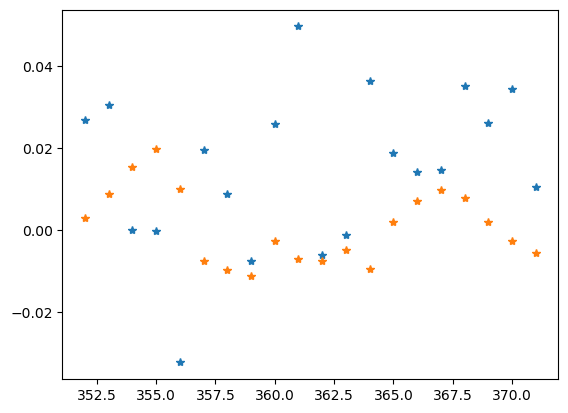

In [67]:
import matplotlib.pyplot as plt
plt.plot(df_test['y'],'*')
plt.plot(df_forecast['y_pred'],'*')

In [83]:
y = df['y']

df['y2'] = y**2
df = df.drop('y', axis=1)
df_train, df_test = df[0:-n_obs], df[-n_obs:]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18932\4097603816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y2'] = y**2


In [85]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -25.40949421025009
BIC :  -25.272263850250795
FPE :  9.221432298085406e-12
HQIC:  -25.354772710385557 

Lag Order = 2
AIC :  -25.488501666192903
BIC :  -25.24781541815903
FPE :  8.521038310038393e-12
HQIC:  -25.392516122987377 

Lag Order = 3
AIC :  -25.504543348613435
BIC :  -25.159940474712194
FPE :  8.385742544123451e-12
HQIC:  -25.36710109701159 

Lag Order = 4
AIC :  -25.499046997245298
BIC :  -25.050063319899966
FPE :  8.43252710405424e-12
HQIC:  -25.31995392336222 

Lag Order = 5
AIC :  -25.462930823304312
BIC :  -24.909098689454044
FPE :  8.743588238591408e-12
HQIC:  -25.24199134951203 

Lag Order = 6
AIC :  -25.41917491447862
BIC :  -24.760023159363083
FPE :  9.136119518608544e-12
HQIC:  -25.156191984298502 

Lag Order = 7
AIC :  -25.403971337017037
BIC :  -24.63902524747814
FPE :  9.278134389058362e-12
HQIC:  -25.098746399814928 

Lag Order = 8
AIC :  -25.4702491469433
BIC :  -24.599030424236233
FPE :  8.685692622118565e-12
HQIC:  -25.122582142424363 

La

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [86]:
results = model.fit(maxlags=13, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Oct, 2022
Time:                     21:20:07
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -24.2777
Nobs:                     321.000    HQIC:                  -25.1246
Log likelihood:           2876.42    FPE:                7.01005e-12
AIC:                     -25.6876    Det(Omega_mle):     4.92850e-12
--------------------------------------------------------------------
Results for equation x1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.002701         0.016855           -0.160           0.873
L1.x1          0.557807         0.059387            9.393           0.000
L1.x2         -0.010688         0.009376           -1.140           0.254
L1.y2         -1.

In [87]:
maxlag=13
grangers_causation_matrix(df_train, variables = df.columns)

,x1_x,x2_x,y2_x
x1_y,1.0000,0.2287,0.3303
x2_y,0.1044,1.0000,0.0315
y2_y,0.0151,0.0001,1.0000


In [88]:
lag_order = results.k_ar

df_input = df_train.values[-lag_order:]
df_forecast = results.forecast(y=df_input, steps=n_obs)
df_forecast = (pd.DataFrame(df_forecast, index=df_test.index, columns=df_test.columns + '_pred'))

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#mean_squared_error(df_test['y2'], df_forecast['y2_pred'], squared=False)
mean_absolute_error(df_test['y2'], df_forecast['y2_pred'])

0.0004992936698770217

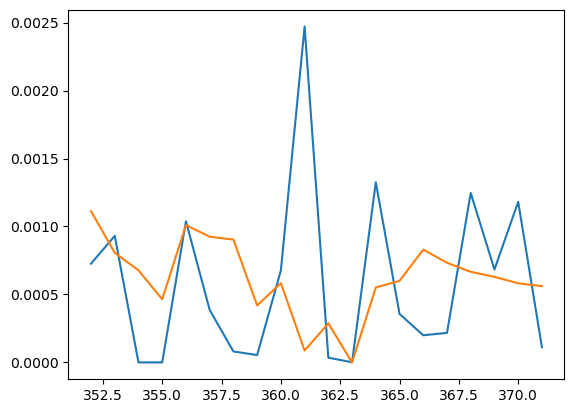

In [96]:
plt.plot(df_test['y2'])
plt.plot(df_forecast['y2_pred'])